In [6]:
from NeuralNet import *
import numpy as np

Epoch: 0, loss: 0.36045858690143967
Epoch: 1, loss: 0.35521410000432063
Epoch: 2, loss: 0.3515069135597266
Epoch: 3, loss: 0.3476657860091398
Epoch: 4, loss: 0.34370331813886085
Epoch: 5, loss: 0.33963522197458995
Epoch: 6, loss: 0.3354798719807871
Epoch: 7, loss: 0.3312577509487535
Epoch: 8, loss: 0.32699082137385044
Epoch: 9, loss: 0.3227018579036847
Epoch: 10, loss: 0.3184137778820087
Epoch: 11, loss: 0.31414900511013727
Epoch: 12, loss: 0.3099354462730565
Epoch: 13, loss: 0.30579202391349886
Epoch: 14, loss: 0.3017352851904877
Epoch: 15, loss: 0.29778092073842144
Epoch: 16, loss: 0.29394212903758693
Epoch: 17, loss: 0.2902295632218475
Epoch: 18, loss: 0.28665136950057785
Epoch: 19, loss: 0.2832133010760071
Epoch: 20, loss: 0.2799188901013948
Epoch: 21, loss: 0.27676966039234796
Epoch: 22, loss: 0.27376536490879977
Epoch: 23, loss: 0.2709042340848454
Epoch: 24, loss: 0.26818322354422286
Epoch: 25, loss: 0.2655982523080444
Epoch: 26, loss: 0.2631444250597336
Epoch: 27, loss: 0.260816

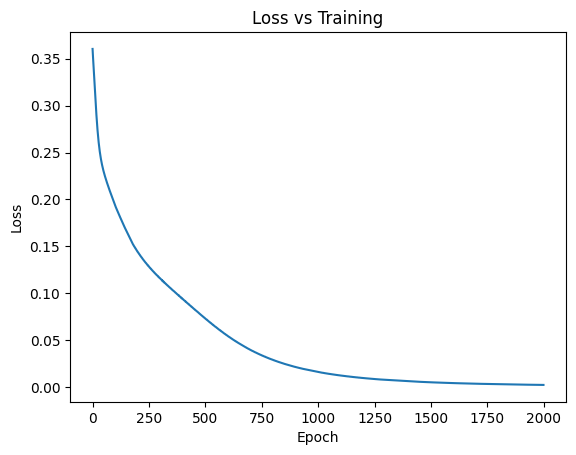

Predicciones:
[[0.08314086]
 [0.98476426]
 [0.96475744]
 [0.01647424]]


In [7]:
nn = Network(
[
    Linear(2, 5),
    Relu(),
    Linear(5,1),
    Sigmoid()
])



X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

nn.train(X, y, epochs=2000, lr=0.1)
print("Predicciones:")
print(nn.forward(X))

In [8]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

# Cargar datos
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizar imágenes a [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Aplanar imágenes: de (28, 28) a (784,)
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Shapes:", X_train.shape, y_train.shape)

2025-05-25 12:20:42.729415: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-25 12:20:42.739296: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748168442.751681   15659 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748168442.755332   15659 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748168442.763960   15659 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Shapes: (60000, 784) (60000, 10)


Epoch: 0, loss: 0.16617813222785244
Epoch: 1, loss: 0.15484768152308626
Epoch: 2, loss: 0.13955288104672695
Epoch: 3, loss: 0.13215617207285482
Epoch: 4, loss: 0.12898816419322104
Epoch: 5, loss: 0.1263736379212852
Epoch: 6, loss: 0.12372393794917019


/home/guillembeltran/Escritorio/infoUPC/REDS NEURONALS/Neural_Network/NeuralNet.py:21: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch: 7, loss: 0.12104112357894362
Epoch: 8, loss: 0.11844348205184746
Epoch: 9, loss: 0.11588142232515257
Epoch: 10, loss: 0.11341803157054405
Epoch: 11, loss: 0.11104856549495458
Epoch: 12, loss: 0.10864879645642145
Epoch: 13, loss: 0.10614703539208356
Epoch: 14, loss: 0.10396890413652078
Epoch: 15, loss: 0.1020853769946419
Epoch: 16, loss: 0.10033143352879789
Epoch: 17, loss: 0.09863584636895438
Epoch: 18, loss: 0.09712495487105613
Epoch: 19, loss: 0.0953374825234054
Epoch: 20, loss: 0.09365303093945176
Epoch: 21, loss: 0.09210917630833489
Epoch: 22, loss: 0.09063323647507224
Epoch: 23, loss: 0.08928274785063303
Epoch: 24, loss: 0.088045936300767
Epoch: 25, loss: 0.08700204762326678
Epoch: 26, loss: 0.08608042419377224
Epoch: 27, loss: 0.08530263376426155
Epoch: 28, loss: 0.08461280043972742
Epoch: 29, loss: 0.08402494581476537
Epoch: 30, loss: 0.08349610357081298
Epoch: 31, loss: 0.08295716964567117
Epoch: 32, loss: 0.08244695643645104
Epoch: 33, loss: 0.08189826605171885
Epoch: 3

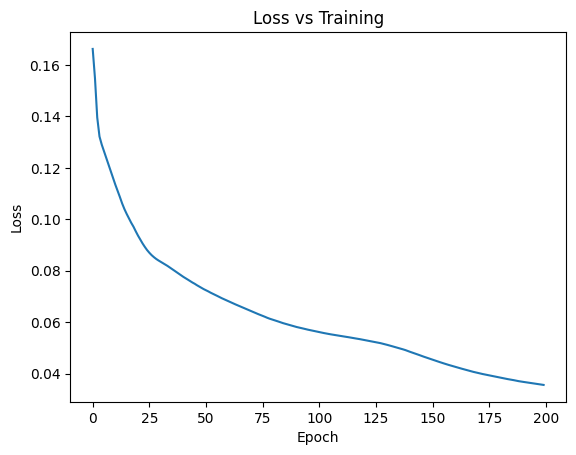

In [10]:
nn = Network(
[
    Linear(784,300),
    Relu(),
    Linear(300,50),
    Sigmoid(),
    Linear(50,10),
    Softmax()
])




nn.train(X_train, y_train, epochs=200, lr=0.1)

In [11]:

y_pred = nn.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)      # clase predicha
y_true_labels = np.argmax(y_test, axis=1)      # clase real

accuracy = np.mean(y_pred_labels == y_true_labels)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7531
